In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
def read_results(file="trade_logs/results_trades.log",exitreason=None):
    with open(file,"r") as f:
        data = f.readlines()
    split_data = [d[:-1].split(",") for d in data]
    opens=[]
    closes=[]
    for ticker,interval,openprice,closeprice,dfname,starttime,exittime,reason in split_data:
        if exitreason:
            if exitreason!=reason:
                continue
        opens.append(float(openprice.split("open")[-1]))
        closes.append(float(closeprice.split("closeprice")[-1])) 
            
    profits = (np.asarray(closes)-np.asarray(opens))/np.asarray(opens)
    startingfund=1
    endingfund = startingfund
    equity = [startingfund]
    for p in profits:
        endingfund *= (1+p)
        equity.append(endingfund)
    return equity,profits
def plot_profits(equity,profits,title=""):
    fig,axx = plt.subplots(2,1,sharex=True)
    ax=axx[0]
    ax.plot(equity,marker="x")
    ax.plot(np.cumsum([0]+profits)+1)
    ax.set_ylabel("equity")
    strr =f"gain={equity[-1]-1:.2%}, trades{len(profits)}, win%{sum(profits>0)/len(profits)*100:.2f}%"
    strr+=f", avg{(np.mean(profits))*100:.2f}%"
    ax.text(0.01,0.99,strr, ha="left",va="top",transform=ax.transAxes)
    ax.set_title(title)
    ax=axx[1]
    ax.set_xlabel("trades")
    ax.plot(profits,marker="x")
    ax.axhline(0)
    plt.show()

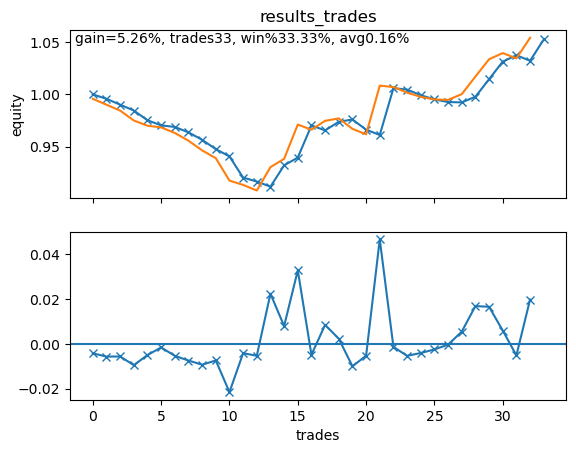

In [3]:
equity,profits = read_results(file="trade_logs/results_trades.log")
plot_profits(equity,profits,"results_trades")

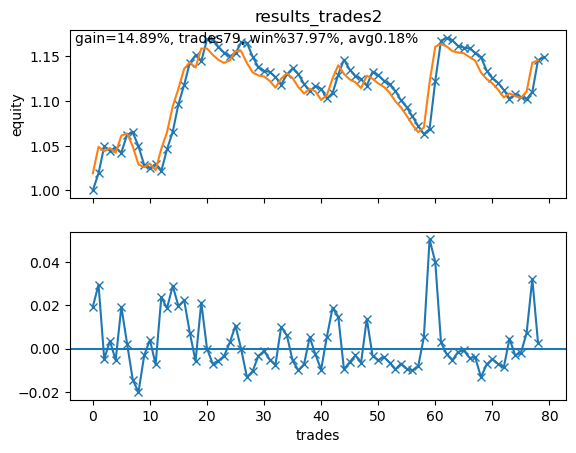

In [4]:
equity,profits = read_results(file="trade_logs/results_trades2.log")
plot_profits(equity,profits,"results_trades2")

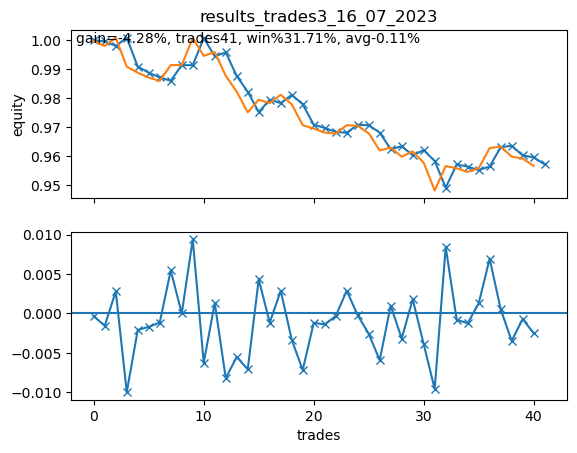

In [5]:
equity,profits = read_results(file="trade_logs/results_trades3_16_07_2023.log")
plot_profits(equity,profits,"results_trades3_16_07_2023")

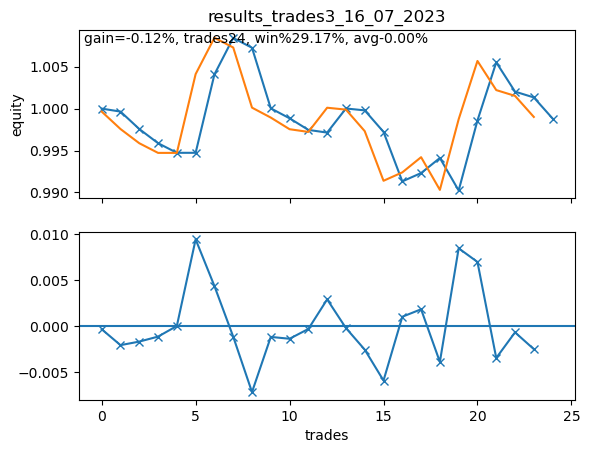

In [6]:
equity,profits = read_results(file="trade_logs/results_trades3_16_07_2023.log",exitreason="exitreasonexit_from_read_signal")
plot_profits(equity,profits,"results_trades3_16_07_2023")